# #FDTDpie

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import cmasher as cmr
%load_ext autoreload
%autoreload 2
import fdtdpie as fd
%config InlineBackend.figure_format='retina'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ##1D

<center> <img src="notebook_imgs/2023-03-23-14-39-51.png" style="width: 50%;"/> </center>

In this case we only need to keep Hz, and Ey. 

Let's define a simulation volume being equal to a line with physical size L. 

Let's also define the resolution of the simulation as r so that the number of cells is n = L/r. 

We will use a time step of dt = r/c, where c is the speed of light. 

We will use a Courant number of 1, so dt = r/c. 

The array being used will then have 2*N elements with the even indices saving the values for Ez and the odd indices saving the values for Hy. 

Let T be equal to the total simulation time. As a source let's assume an electric current density that is oscillating with frequency $\omega$ in the y direction. 

### ###FD1Dfree with Periodic or Metallic Boundaries

#### ####Periodic

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 15552.20it/s]

Running simulation for 2000 frogsteps ...
Simulation complete


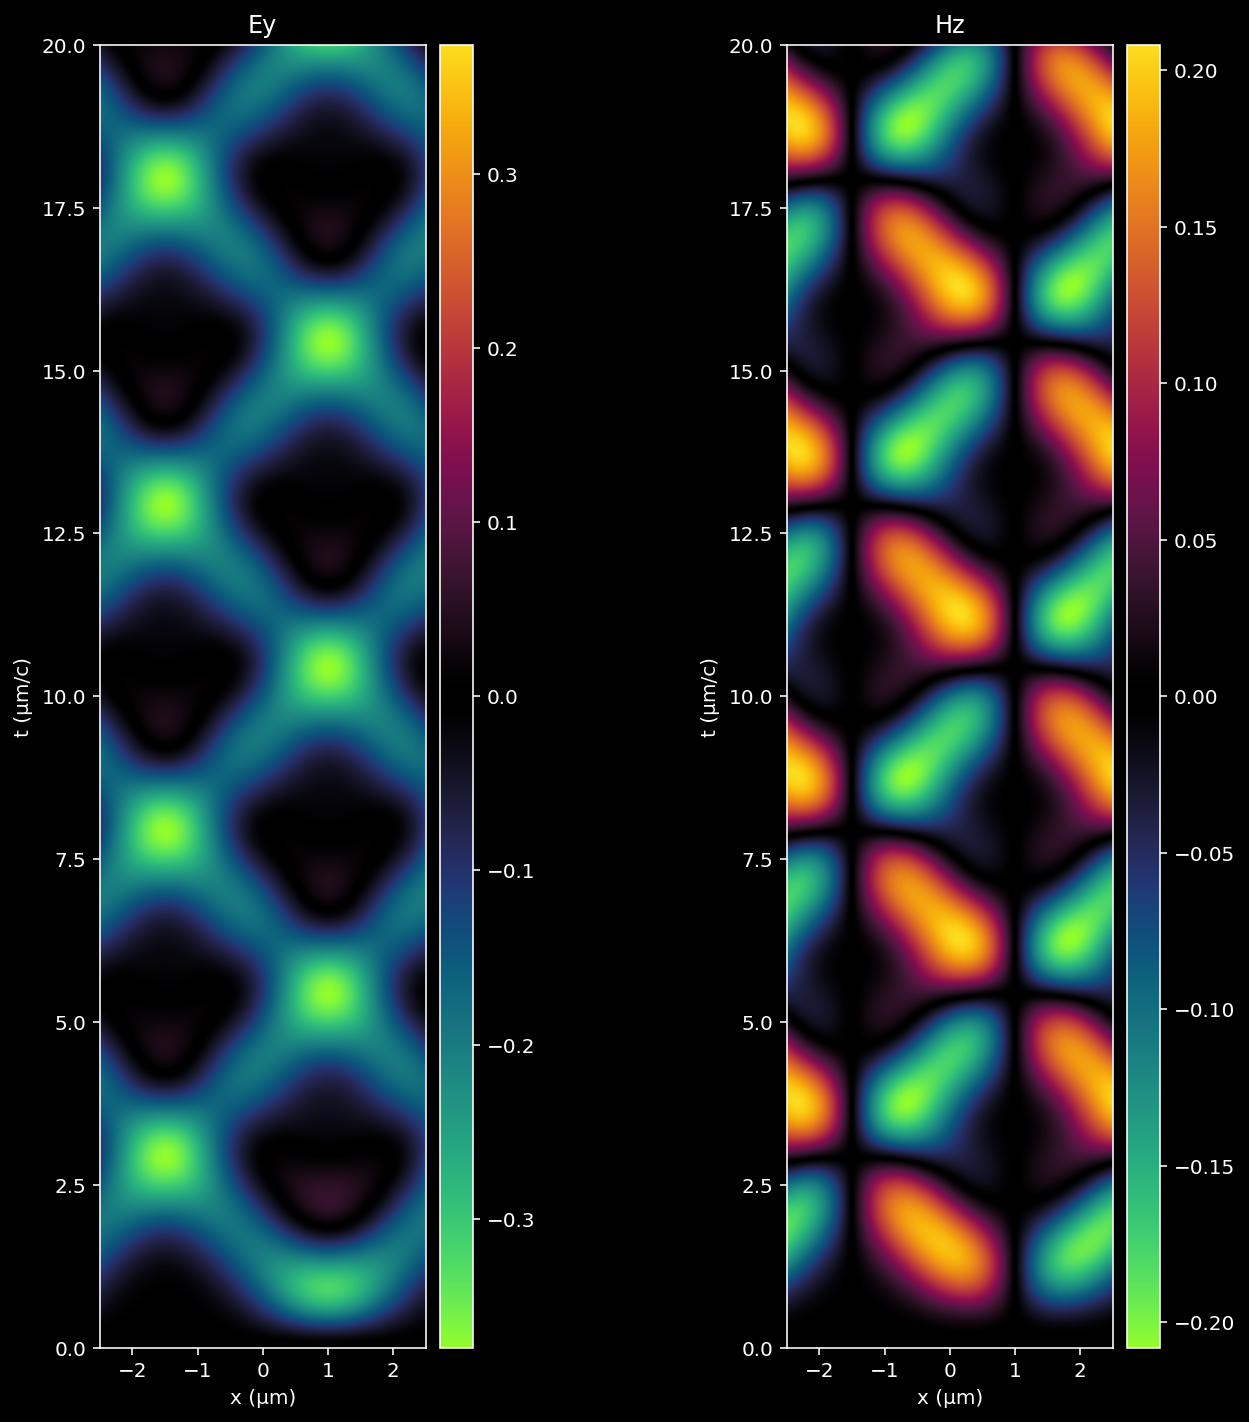

In [10]:
L = 5
λ = L/2.11 # wavelength
ω = 2*np.pi/λ # angular frequency
dx = 0.01
T = 20.
def Jsource1(x,t):
    return np.sin(ω*t) * np.exp(-t) * np.sin((x-1)**2)
def Jsource2(x,t):
    x = x - 1
    x = x - L*np.floor(x/L + 1/2)
    return np.sin(ω*t) * np.exp(-t) * np.exp(-(x)**2)
sim_params = {
    'dx': dx,
    'L': L,
    'T': T,
    'boundary': 'periodic',
    'Jsource': Jsource2

}
sim = fd.FD1Dfree(sim_params)
sim.run()
sim.plot(['Ey','Hz'])

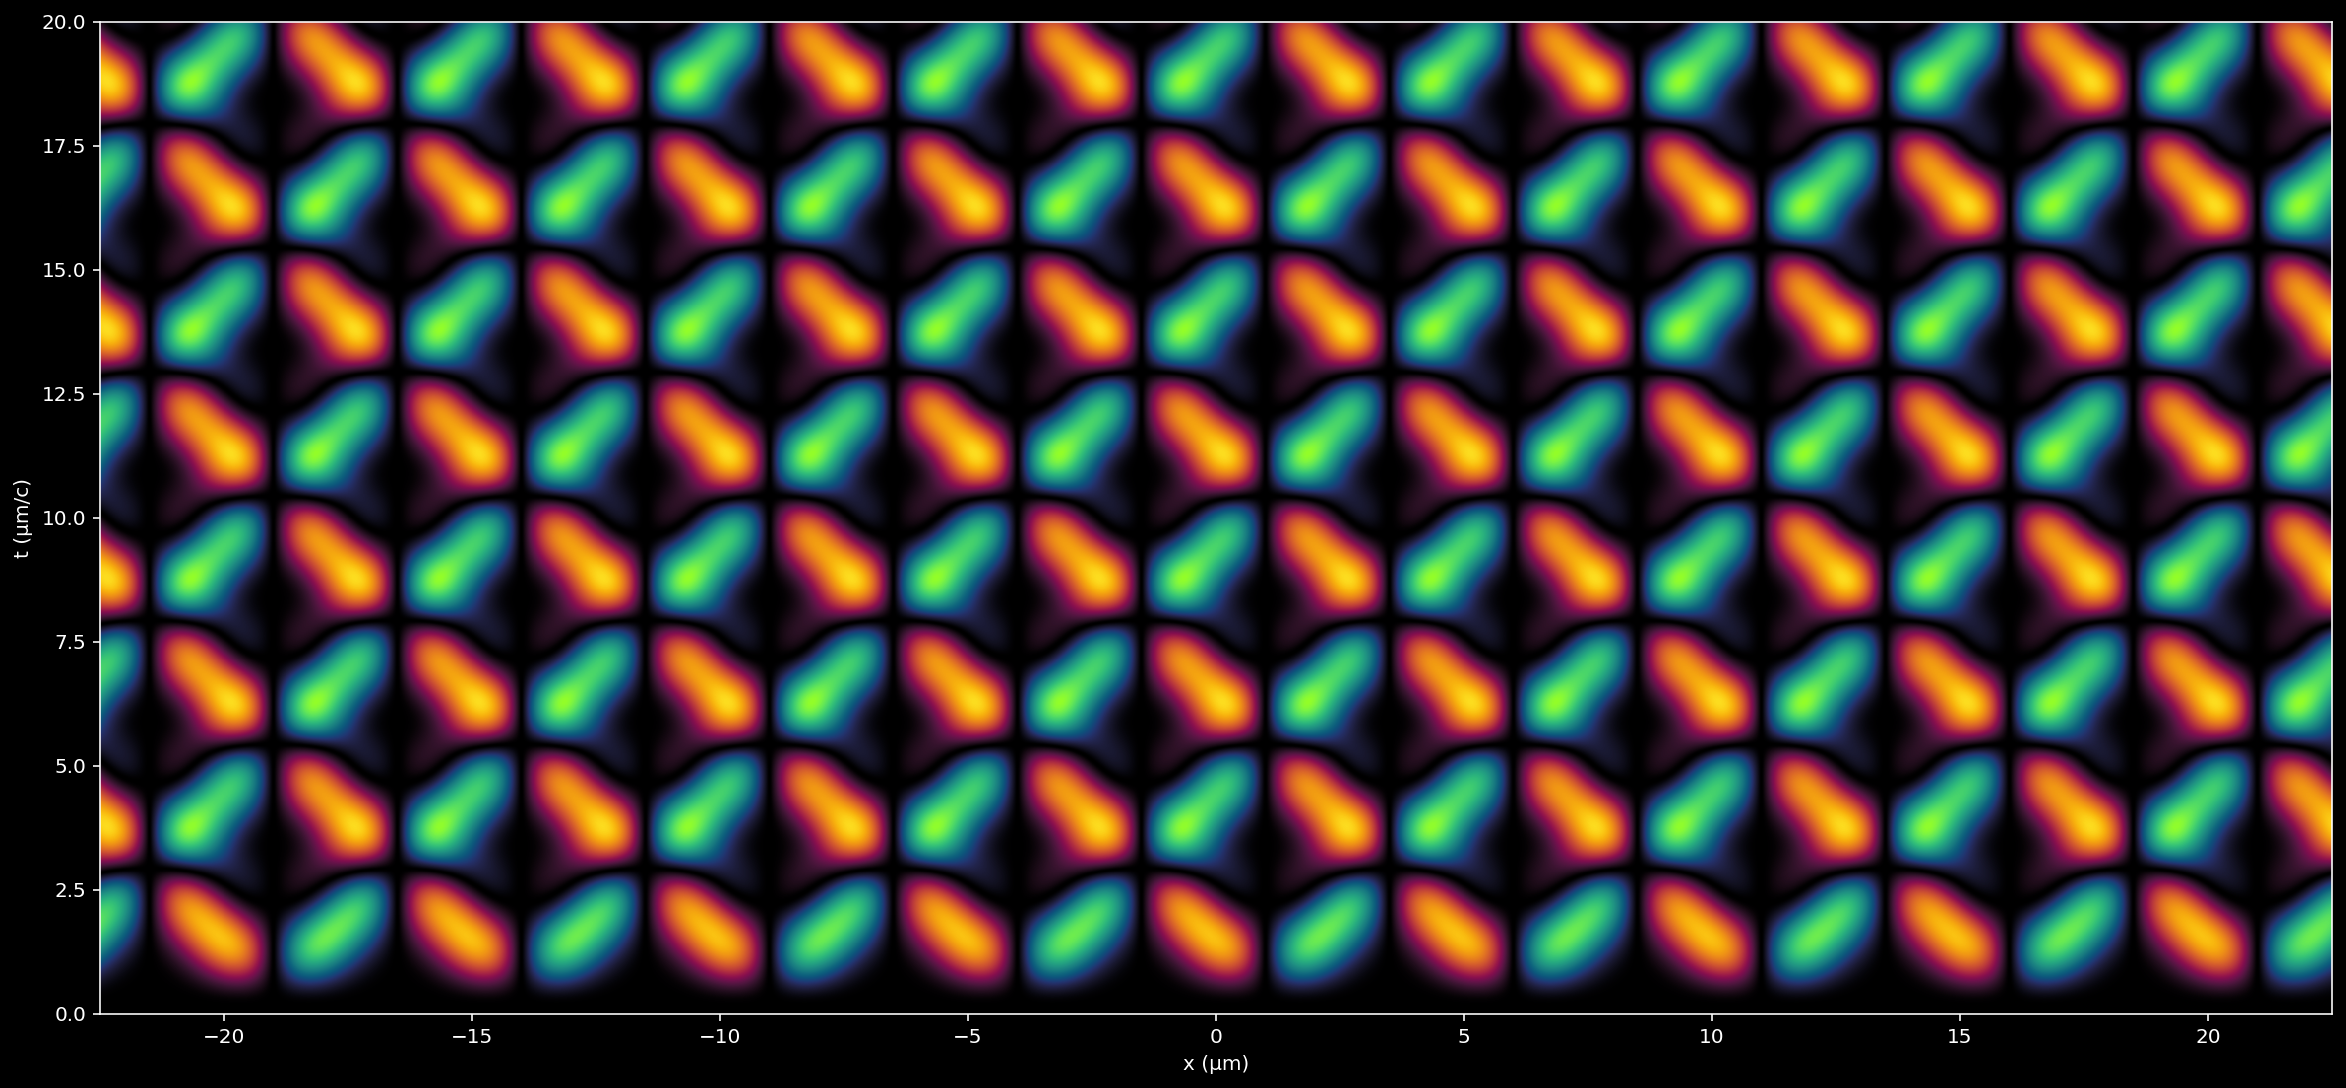

In [11]:
plotData = sim.get_field_history('Hz')
repeats = 9
plotData = np.tile(plotData, (1,repeats))
minF = np.min(plotData)
maxF = np.max(plotData)
prange = max(abs(minF), abs(maxF))

extent = [-sim.L/2*repeats, sim.L/2*repeats, 0, sim.N*sim.dt]
plt.figure(figsize=(20,20))
plt.imshow(plotData, 
            interpolation='none',
            cmap=cmr.wildfire,
            extent=extent,
            aspect=1,
            origin='lower',
            vmin=-prange,
            vmax=prange)
plt.xlabel('x (μm)')
plt.ylabel('t (μm/c)')
plt.show()

#### ####Metallic

100%|██████████| 843/843 [00:00<00:00, 15764.69it/s]

Running simulation for 843 frogsteps ...
Simulation complete


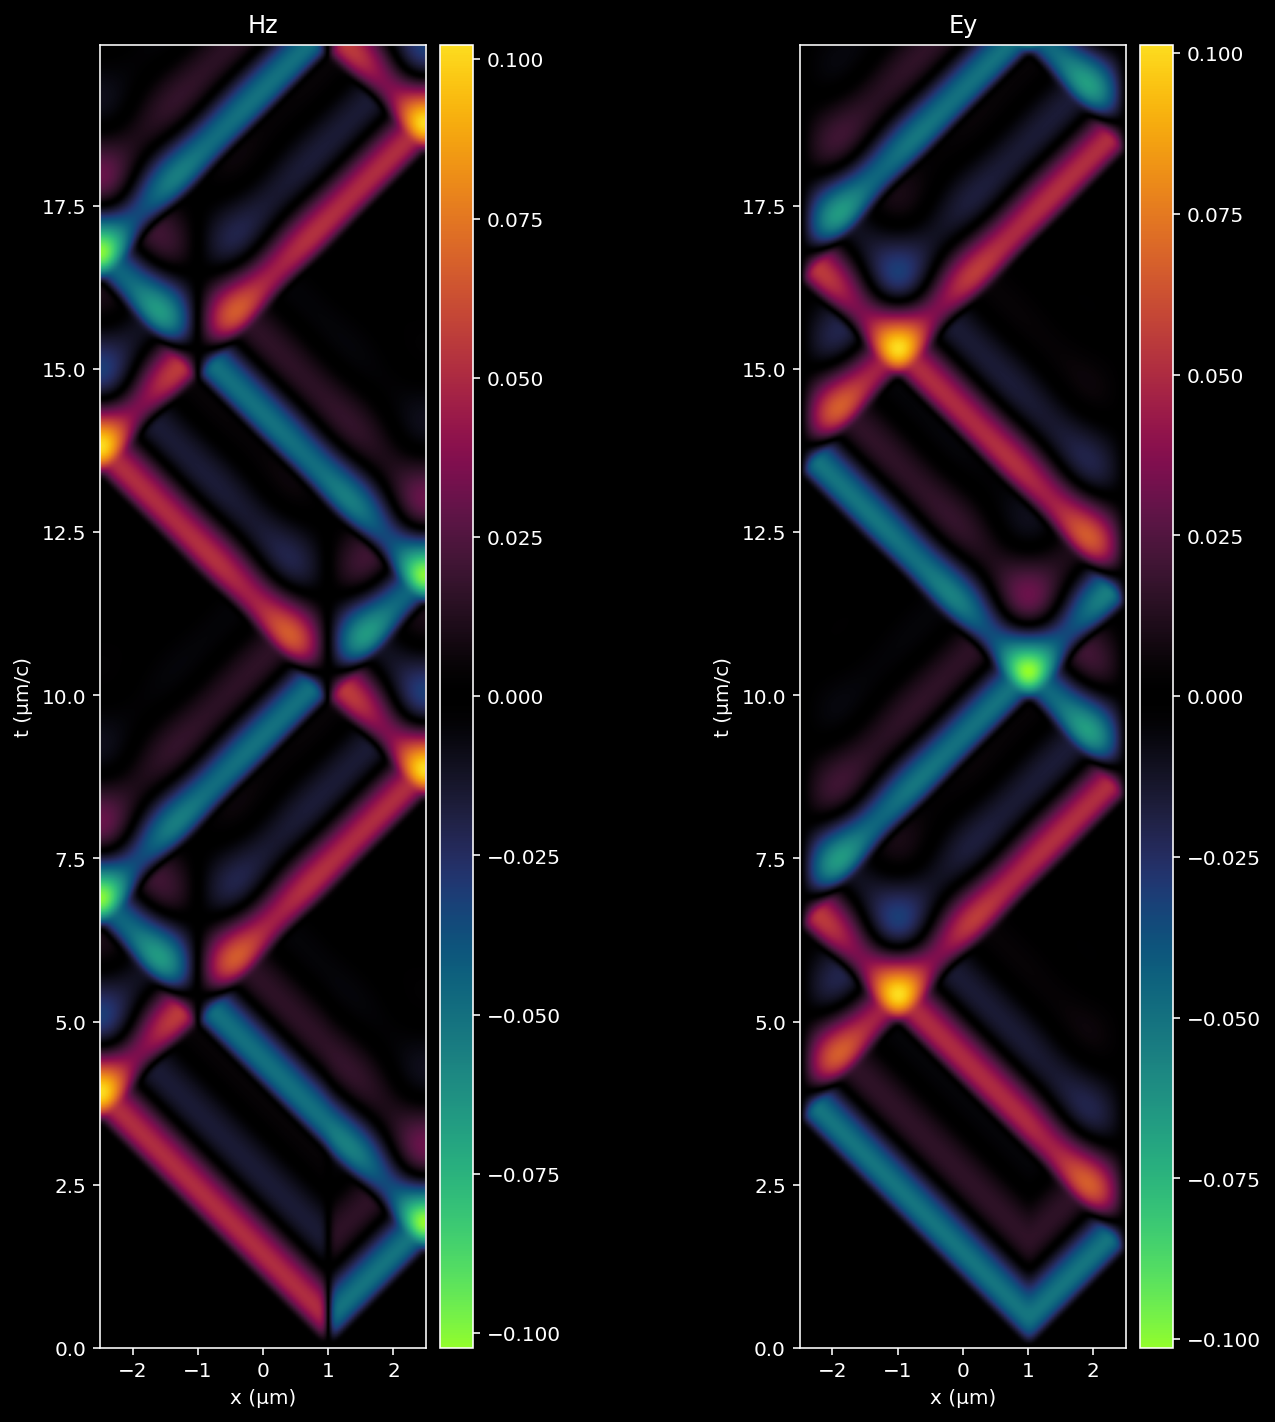

In [12]:
L = 5
λ = L/2.11 # wavelength
ω = 2*np.pi/λ # angular frequency
dx = λ/100.
T = 20.
def Jsource1(x,t):
    return np.sin(ω*t) * np.exp(-t**2) * np.sin((x-1)**2)
def Jsource2(x,t):
    return np.sin(ω*t) * np.exp(-t) * np.exp(-(x-1)**2*100)

sim_params = {
    'c': c,
    'dx': dx,
    'L': L,
    'T': T,
    'boundary': 'metallic',
    'Jsource': Jsource2

}
sim = fd.FD1Dfree(sim_params)
sim.run()
sim.plot(['Hz','Ey'])

### ###FD1D with Periodic or Metallic Boundaries

#### ####Metallic

  0%|          | 0/843 [00:00<?, ?it/s]

100%|██████████| 843/843 [00:00<00:00, 13065.74it/s]

Running simulation for 843 frogsteps ...
Simulation complete


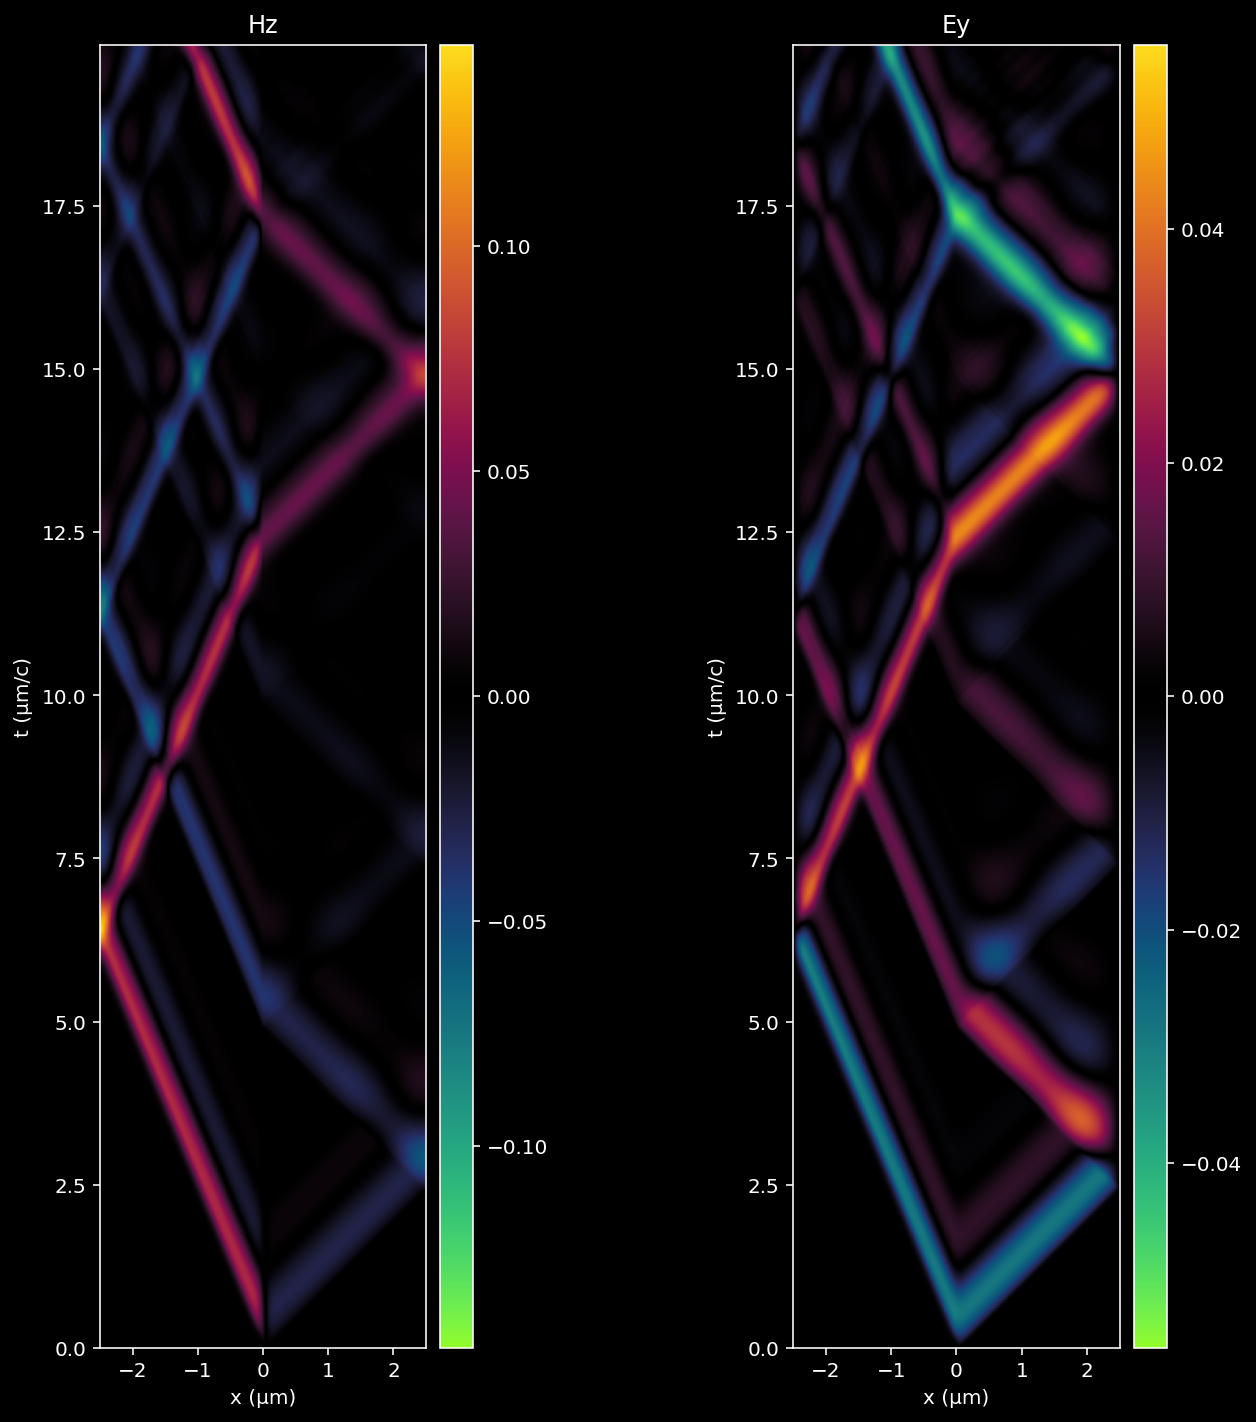

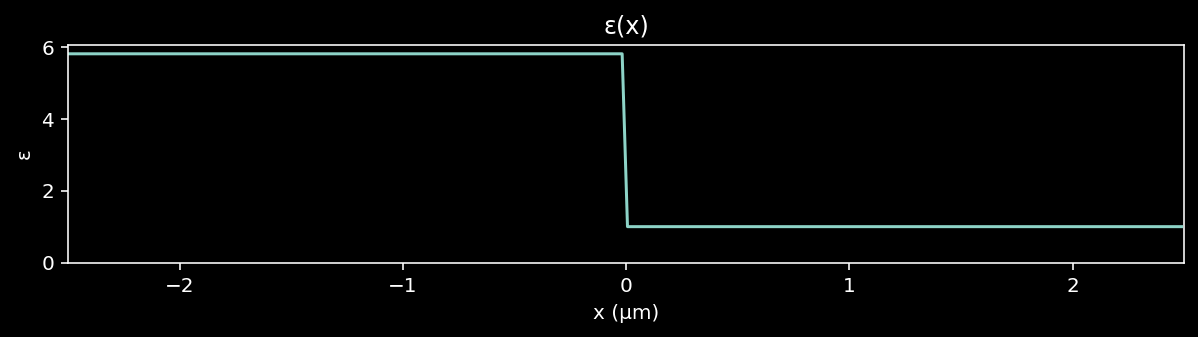

In [14]:
L = 5
λ = L/2.11 # wavelength
ω = 2*np.pi/λ # angular frequency
dx = λ/100.
c = 1
T = 20.

def Jsource1(x,t):
    return np.sin(ω*t) * np.exp(-t**2) * np.sin((x-1)**2)

def Jsource2(x,t):
    return np.sin(ω*t) * np.exp(-t) * np.exp(-(x)**2*100)

def epsilon(x):
    return np.where(x <= 0, 2.41**2, 1)

sim_params = {
    'dx': dx,
    'L': L,
    'T': T,
    'boundary': 'metallic',
    'Jsource': Jsource2,
    'epsilonFun': epsilon

}
sim = fd.FD1D(sim_params)
sim.run()
sim.plot(['Hz','Ey'])
sim.plot_epsilon()

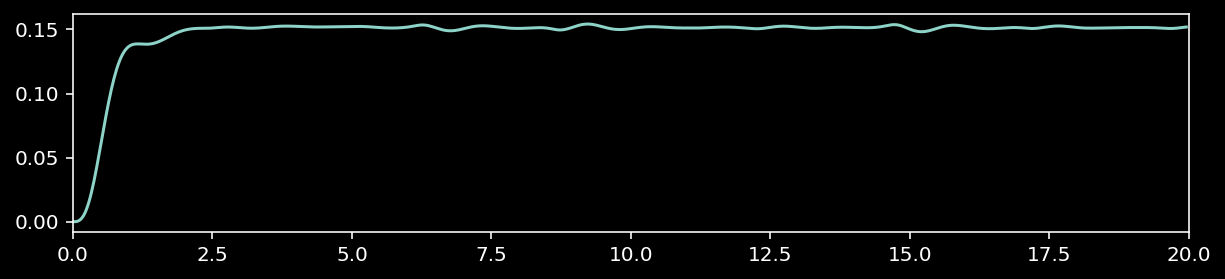

In [15]:
Ey = sim.get_field_history('Ey')
Hz = sim.get_field_history('Hz')
energy = np.sum(1/sim.invEpsilon * Ey**2 + Hz**2, axis=1)
plt.figure(figsize=(10,2))
plt.plot(sim.times, energy)
plt.xlim(0, sim.T)
plt.show()

#### ####Periodic

100%|██████████| 2000/2000 [00:00<00:00, 12659.09it/s]

Running simulation for 2000 frogsteps ...
Simulation complete


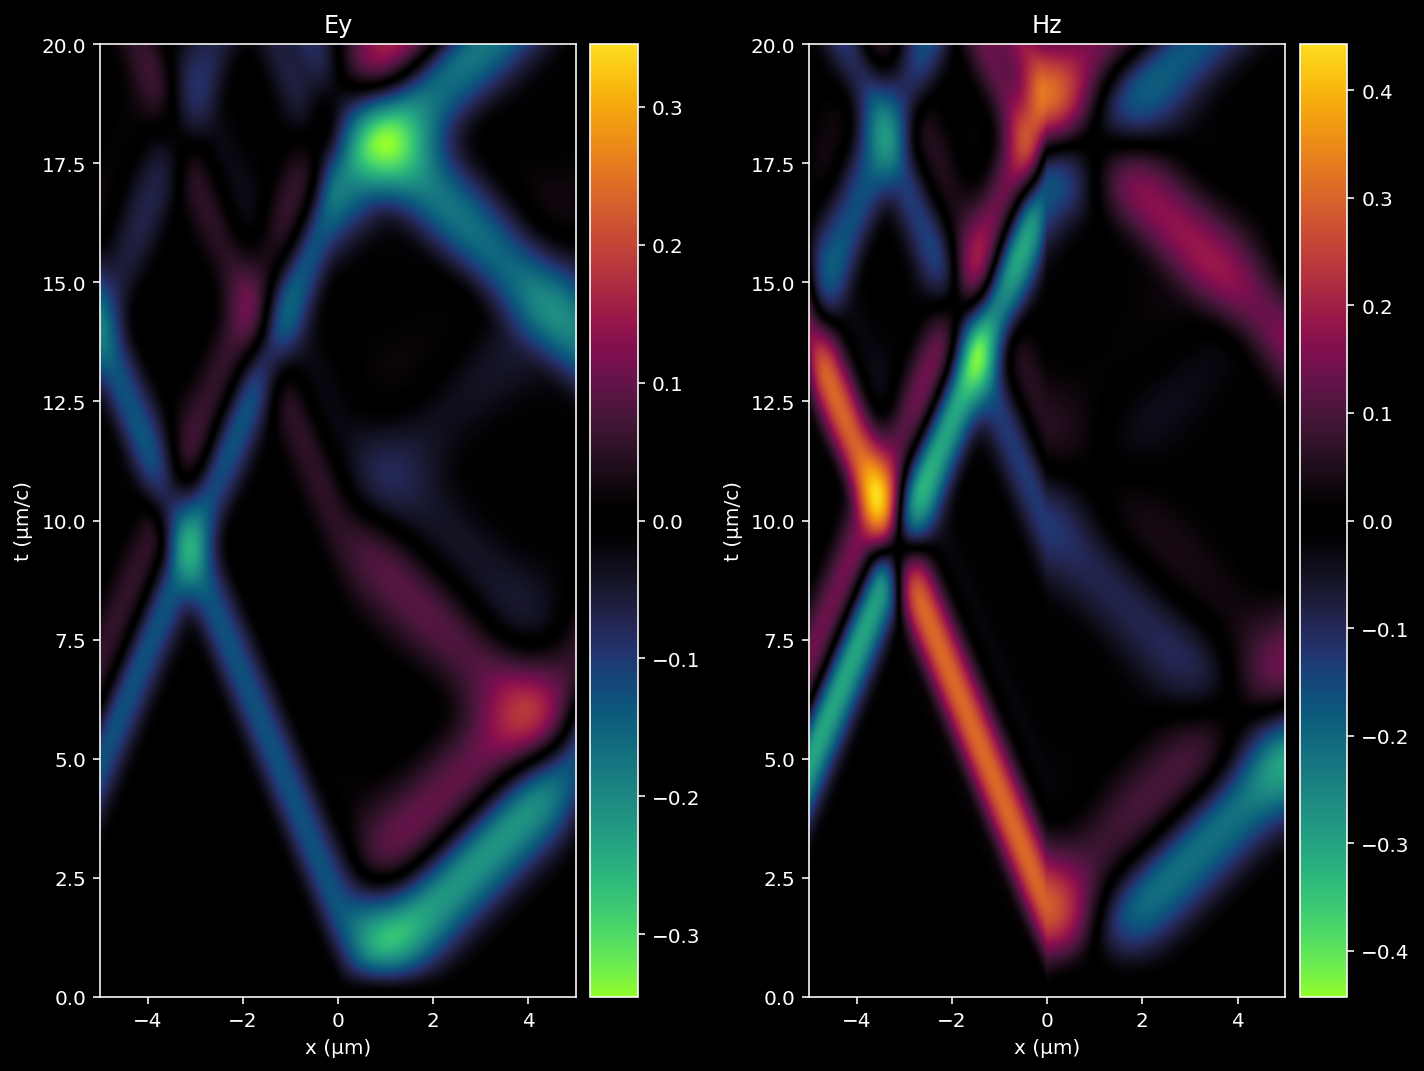

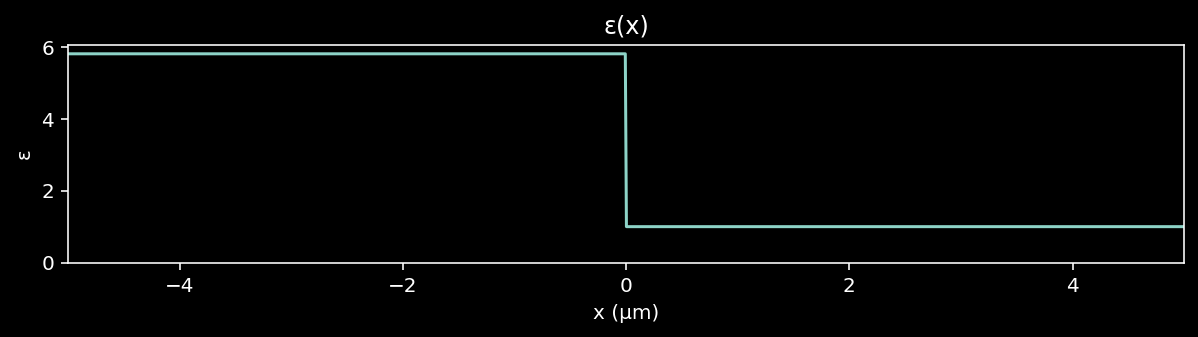

In [26]:
L = 10
λ = L/2.11 # wavelength
ω = 2*np.pi/λ # angular frequency
dx = 0.01
T = 20.

def Jsource1(x,t):
    return np.sin(ω*t) * np.exp(-t) * np.sin((x-1)**2)

def Jsource2(x,t):
    x = x - 1
    x = x - L*np.floor(x/L + 1/2)
    return np.sin(ω*t) * np.exp(-t) * np.exp(-(x)**2)

# def epsilon(x):
#     return 1 + np.sin(x*2*np.pi/λ/2)**2

def epsilon(x):
    return np.where(x <= 0, 2.41**2, 1)

# def epsilon(x):
#     return np.ones(x.shape)

sim_params = {
    'dx': dx,
    'L': L,
    'T': T,
    'boundary': 'periodic',
    'Jsource': Jsource2,
    'epsilonFun': epsilon

}
sim = fd.FD1D(sim_params)
sim.run()
sim.plot(['Ey','Hz'])
sim.plot_epsilon()

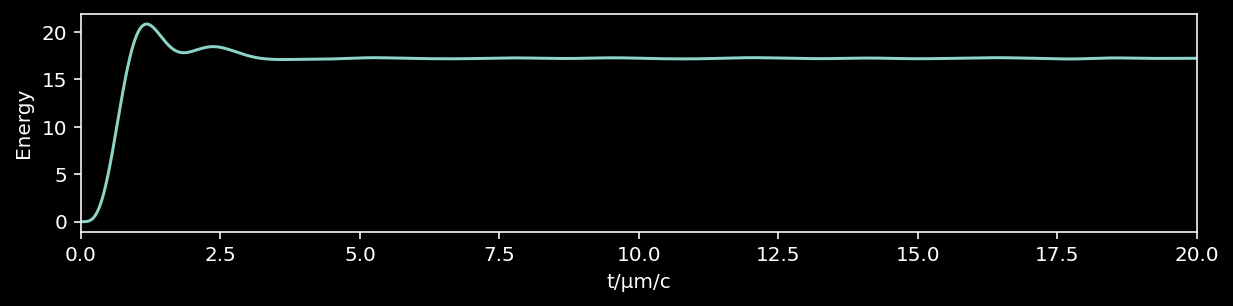

In [19]:
Ey = sim.get_field_history('Ey')
Hz = sim.get_field_history('Hz')
energy = np.sum(1/sim.invEpsilon * Ey**2 + Hz**2, axis=1)
plt.figure(figsize=(10,2))
plt.plot(sim.times, energy)
plt.xlim(0, sim.T)
plt.xlabel('t/μm/c')
plt.ylabel('Energy')
#plt.xlim(sim.T*0.8, sim.T)
plt.show()

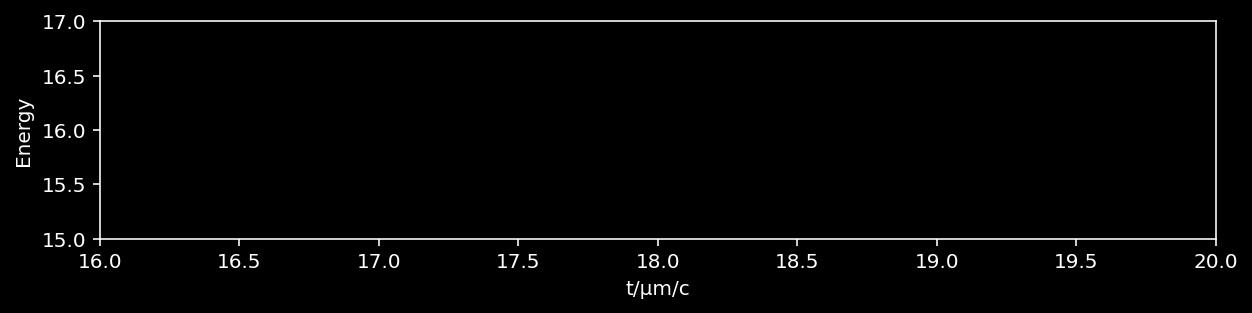

In [20]:
Ey = sim.get_field_history('Ey')
Hz = sim.get_field_history('Hz')
energy = np.sum(1/sim.invEpsilon * Ey**2 + Hz**2, axis=1)
plt.figure(figsize=(10,2))
plt.plot(sim.times, energy)
plt.xlim(0, sim.T)
plt.xlabel('t/μm/c')
plt.ylabel('Energy')
plt.xlim(sim.T*0.8, sim.T)
plt.ylim(15,17)
plt.show()

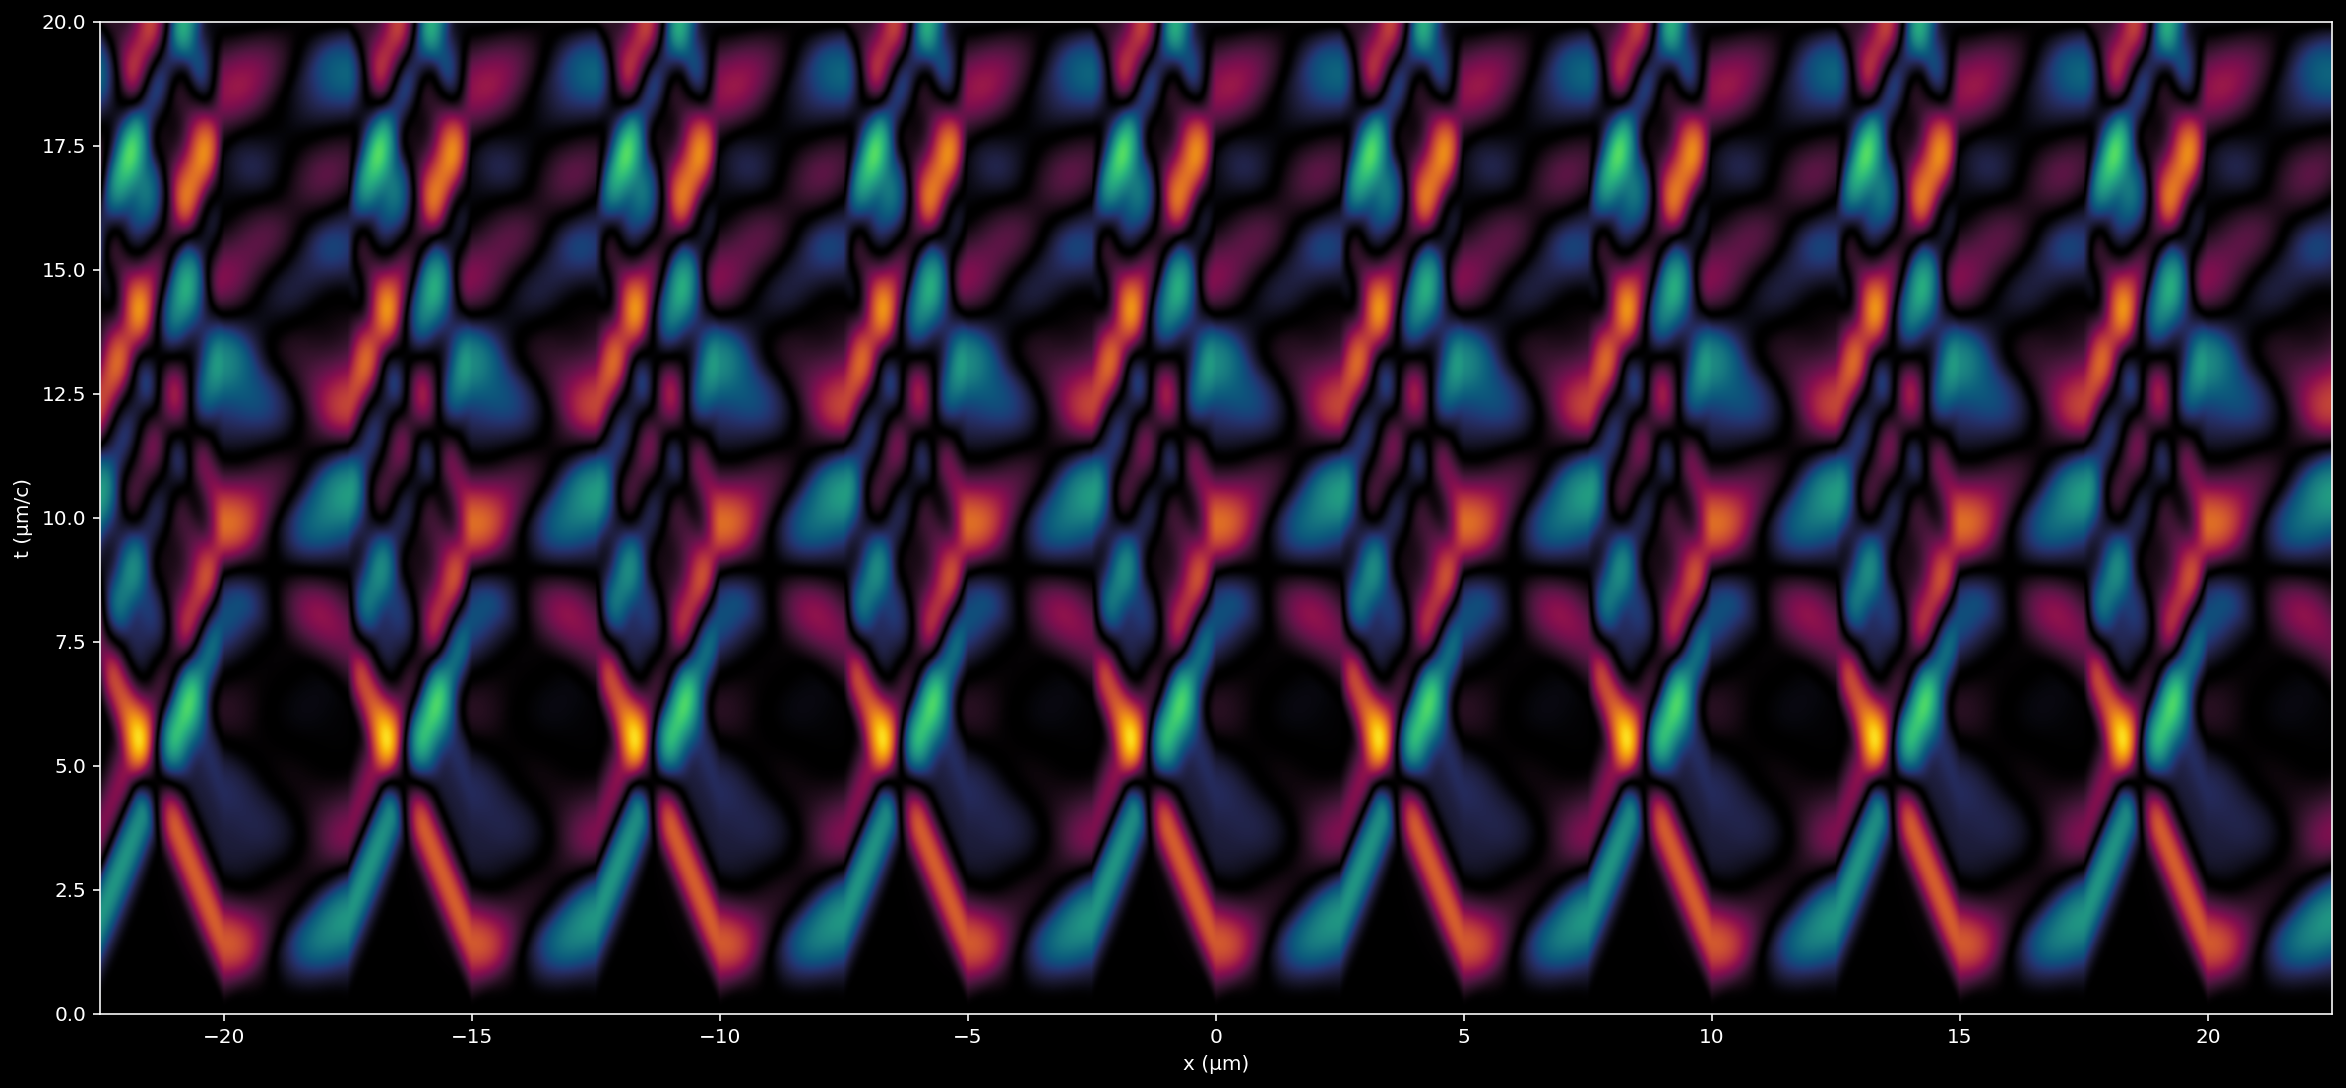

In [21]:
plotData = sim.get_field_history('Hz')
repeats = 9
plotData = np.tile(plotData, (1,repeats))
minF = np.min(plotData)
maxF = np.max(plotData)
prange = max(abs(minF), abs(maxF))

extent = [-sim.L/2*repeats, sim.L/2*repeats, 0, sim.N*sim.dt]
plt.figure(figsize=(20,20))
plt.imshow(plotData, 
            interpolation='none',
            cmap=cmr.wildfire,
            extent=extent,
            aspect=1,
            origin='lower',
            vmin=-prange,
            vmax=prange)
plt.xlabel('x (μm)')
plt.ylabel('t (μm/c)')
plt.show()

## ####Development Code

### ###Point source

In [22]:
c = 1  # speed of light

dx = 0.01 # field values every 0.5 μm

L = 10 # in μm
λ = L/11 # wavelength
k = 2*np.pi/λ # wave number
ω = c*k # angular frequency

T = L/c * 5 # simulation time
dt = dx/c # time step
N = int(T/dt) # number of leapfrog steps
n = int(L/dx) # number of Ez values
cNum = dt/dx # the Courant number

yeeChunks = 2*n
# Make the array have an odd number of elements so that the element in the middle will be for Ey:
if yeeChunks % 2 == 0: 
    yeeChunks += 1
# space coordinates corresponding to Yee cell:
x_coords = np.linspace(-L/2, L/2, yeeChunks)
# index of the middle element
midIndex = int((yeeChunks-1)/2) 
# index of the middle element in the reduced array for Hz
subMidIndex = int((midIndex-1)/2)

# the even indices are for Ey
# the odd indices are for Hz
yeePrev = np.zeros(yeeChunks)
yeeNext = np.zeros(yeeChunks)
# save the history of the field in this array
yeeHistory = np.zeros((N,yeeChunks))

# time
t = 0.
times = np.zeros(N)

def Jsource(t):
    return np.sin(ω*t) * np.exp(-t**2*0.01)

for iter in range(N):
    # update Hz
    # calculate the gradient of Ey
    Ey         = yeeNext[::2]
    Eygradient = np.diff(Ey)
    delta      = -cNum*Eygradient
    # add the source term which is smack in the middle
    delta[subMidIndex] += - dt * Jsource(t)
    # update Hz with the calculated delta
    yeeNext[1::2] = yeePrev[1::2] + delta

    # now update Ez
    # calculate the gradient of Hz
    Hz = yeeNext[1::2]
    Hzgradient    = np.diff(Hz, prepend=Hz[0], append=Hz[-1])
    delta         = -cNum*Hzgradient
    yeeNext[::2]  = yeePrev[::2] + delta
    
    # update the past field to be the current field
    yeePrev = yeeNext
    # add the current field to the history books
    yeeHistory[iter] = yeeNext
    # increment time by dt
    times[iter] = t
    t += dt


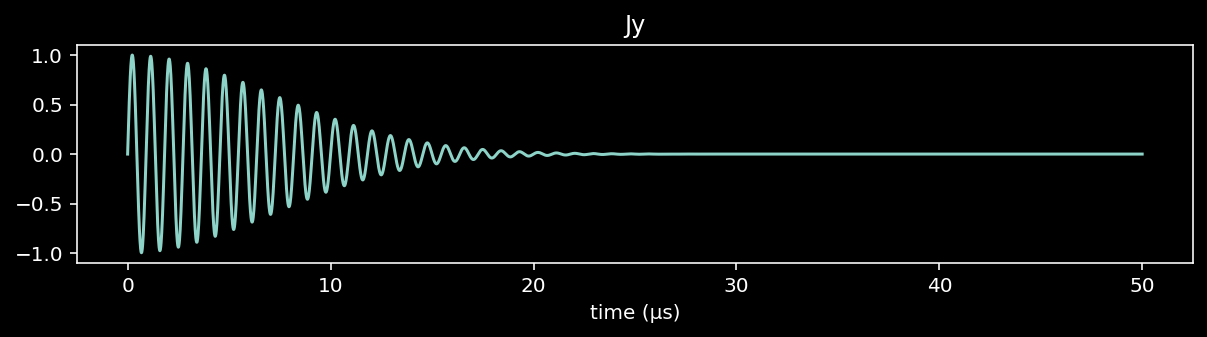

In [23]:
plt.figure(figsize=(10,2))
plt.plot(times, Jsource(times),label="Jsource")
plt.xlabel("time (μs)")
plt.title("Jy")
plt.show()

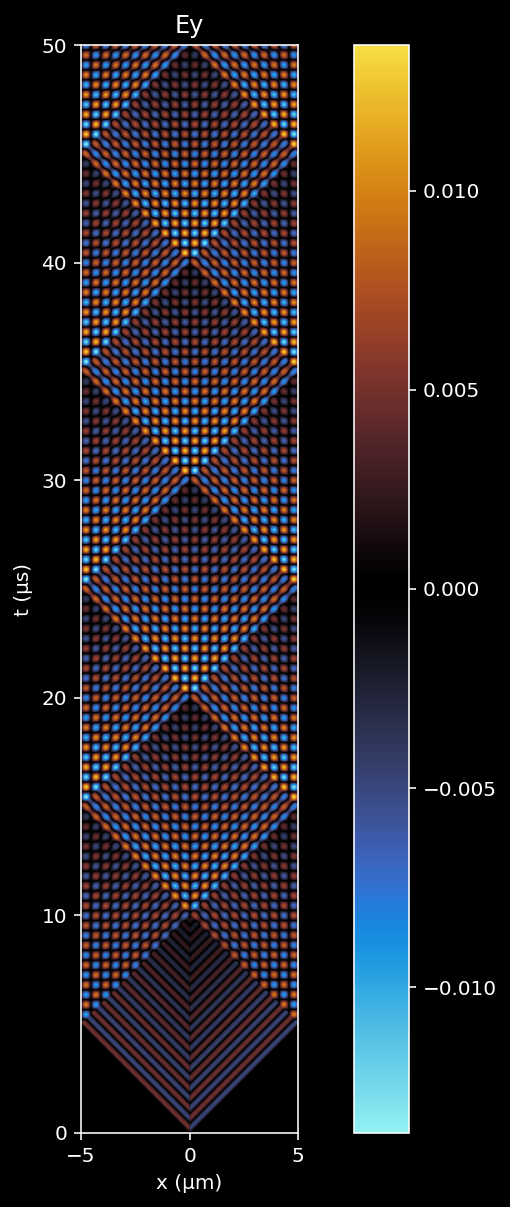

In [25]:
extent   = [-L/2, L/2, 0, N*dt]
plotData = yeeHistory[:,0::2]
plt.figure(figsize=(10,10))
plt.imshow(plotData,
        extent=extent,
        cmap=cmr.iceburn,
        aspect=1,
        origin='lower')
plt.xlabel('x (μm)')
plt.ylabel('t (μm/c)')
plt.title('Ey')
plt.colorbar()
plt.show()
    

### ###Extended source

In [16]:
c = 1  # speed of light

dx = 0.01 # field values every 0.5 μm

L = 5.1 # in μm
λ = L/10 # wavelength
k = 2*np.pi/λ # wave number
ω = 2*np.pi/λ # angular frequency

T = L/c * 2 # simulation time
dt = dx/c # time step
N = int(T/dt) # number of leapfrog steps
n = int(L/dx) # number of Ez values
cNum = dt/dx # the Courant number

yeeChunks = 2*n
# Make the array have an odd number of elements so that the element in the middle will be for Ey:
if yeeChunks % 2 == 0: 
    yeeChunks += 1
# space coordinates corresponding to Yee cell:
x_coords = np.linspace(-L/2, L/2, yeeChunks)
x_coords_Hz = x_coords[1::2]
# index of the middle element
midIndex = int((yeeChunks-1)/2) 
# index of the middle element in the reduced array for Hz
subMidIndex = int((midIndex-1)/2)

# the even indices are for Ey
# the odd indices are for Hz
yeePrev = np.zeros(yeeChunks)
yeeNext = np.zeros(yeeChunks)
# save the history of the field in this array
yeeHistory = np.zeros((N,yeeChunks))

# time
t = 0.
times = np.zeros(N)

def Jsource(x,t):
    return np.sin(ω*t) * np.exp(-t**2) * np.cos(-x**2)

for iter in range(N):
    # update Hz
    # calculate the gradient of Ey
    Ey         = yeeNext[::2]
    Eygradient = np.diff(Ey)
    delta      = -cNum*Eygradient
    # add the source term which is smack in the middle
    delta += - dt * Jsource(x_coords_Hz,t)
    # update Hz with the calculated delta
    yeeNext[1::2] = yeePrev[1::2] + delta

    # now update Ez
    # calculate the gradient of Hz
    Hz = yeeNext[1::2]
    Hzgradient    = np.diff(Hz, prepend=Hz[0], append=Hz[-1])
    delta         = -cNum*Hzgradient
    yeeNext[::2]  = yeePrev[::2] + delta
    
    # update the past field to be the current field
    yeePrev = yeeNext
    # add the current field to the history books
    yeeHistory[iter] = yeeNext
    # increment time by dt
    times[iter] = t
    t += dt


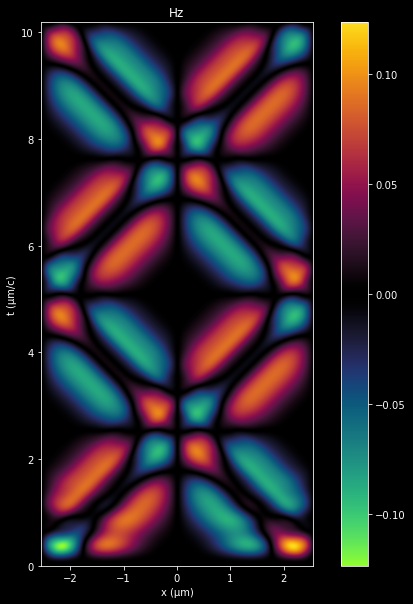

In [17]:
extent   = [-L/2, L/2, 0, N*dt]
plotData = yeeHistory[:,0::2]
plt.figure(figsize=(10,10))
plt.imshow(plotData,
        extent=extent,
        cmap=cmr.wildfire,
        aspect=1,
        origin='lower')
plt.xlabel('x (μm)')
plt.ylabel('t (μm/c)')
plt.title('Hz')
plt.colorbar()
plt.show()
    

### ###Extended source // Reflective Boundaries (code encapsulated in a Class)

In [18]:
from tqdm import tqdm

In [19]:
class FTDpy1D():
    '''
    1D FDTD

    Reflective boundary conditions are used on both of the simulation domain

    Parameters
    ----------
    sim_params : dict
        Dictionary containing the following simulation parameters
        T : float
            Total simulation time in seconds
        L : float
            Length of the simulation domain in um
        c : float
            Speed of light in um/ps
        dx : float
            Spatial resolution in um
        Jsource : function
            Source function for the electric current density
    '''
    def __init__(self, sim_params):
        self.T = sim_params['T']
        self.L = sim_params['L']
        self.c = sim_params['c']
        self.dx = sim_params['dx']
        self.Jsource = sim_params['Jsource']

        self.dt = self.dx/self.c
        self.N = int(self.T/self.dt)
        self.n = int(self.L/self.dx)
        self.cNum = self.dt/self.dx
        self.yeeChunks = 2 * self.n
        if self.yeeChunks % 2 == 0: 
            self.yeeChunks += 1

        self.xcoords = np.linspace(-self.L/2, self.L/2, self.yeeChunks)
        self.xcoords_Hz = self.xcoords[1::2]
        self.midIndex = int((self.yeeChunks-1)/2)
        self.subMidIndex = int((self.midIndex-1)/2)
        self.yeePrev = np.zeros(self.yeeChunks)
        
        self.yeeNext = np.zeros(self.yeeChunks)
        self.yeeHistory = np.zeros((self.N,self.yeeChunks))
        self.t = 0.
        self.times = np.zeros(self.N)
    
    def run(self):
        '''
        Run the simulation.
        '''
        print("Running simulation for {} frogsteps ...".format(self.N))
        for iter in tqdm(range(self.N)):
            # update Hz
            # calculate the gradient of Ey
            Ey         = self.yeeNext[::2]
            Eygradient = np.diff(Ey)
            delta      = -self.cNum*Eygradient
            # add the source term which is smack in the middle
            delta += - self.dt * self.Jsource(self.xcoords_Hz, self.t)
            # update Hz with the calculated delta
            self.yeeNext[1::2] = self.yeePrev[1::2] + delta
            self.yeeNext[1] = 0
            self.yeeNext[-2] = 0

            # now update Ez
            # calculate the gradient of Hz
            Hz = self.yeeNext[1::2]
            Hzgradient    = np.diff(Hz, prepend=Hz[0], append=Hz[-1])
            delta         = -cNum*Hzgradient
            self.yeeNext[::2]  = self.yeePrev[::2] + delta
            
            # update the past field to be the current field
            self.yeePrev = self.yeeNext
            # add the current field to the history books
            self.yeeHistory[iter] = self.yeeNext
            # increment time by dt
            self.times[iter] = t
            self.t += dt
        print("Simulation complete")
    
    def plot(self, plotField):
        '''
        Plots the Hz field.
        '''
        extent   = [-self.L/2, self.L/2, 
                    0, self.N*self.dt]
        if plotField == 'Hz':
            plotData = self.yeeHistory[:,0::2]
        elif plotField == 'Ey':
            plotData = self.yeeHistory[:,1::2]
        else:
            raise ValueError("Invalid field to plot")
        minF = np.min(plotData)
        maxF = np.max(plotData)
        range = max(abs(minF), abs(maxF))
        plt.figure(figsize=(10,10))
        plt.imshow(plotData,
                extent=extent,
                cmap=cmr.wildfire,
                vmin=-range,
                vmax=range,
                aspect=1,
                origin='lower')
        plt.xlabel('x (μm)')
        plt.ylabel('t (μm/c)')
        plt.title(plotField)
        plt.colorbar()
        plt.show()

In [20]:
L = 5
λ = L/2.11 # wavelength
ω = 2*np.pi/λ # angular frequency
dx = 0.01
c = 1
T = 20.
def Jsource1(x,t):
    return np.sin(ω*t) * np.exp(-t**2) * np.sin(x**2)
def Jsource2(x,t):
    return np.sin(ω*t) * np.exp(-t) * np.exp(-x**2*100)
sim_params = {
    'c': c,
    'dx': dx,
    'L': L,
    'T': T,
    'Jsource': Jsource2
}
sim = FTDpy1D(sim_params)
sim.run()

100%|██████████| 2000/2000 [00:00<00:00, 19324.63it/s]

Running simulation for 2000 frogsteps ...
Simulation complete


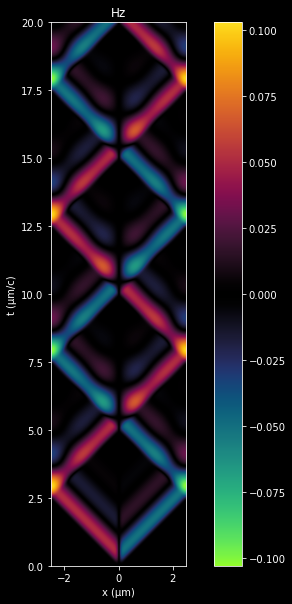

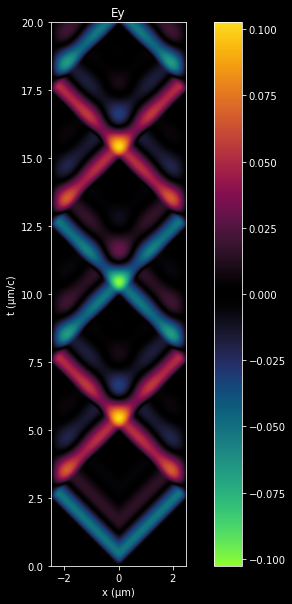

In [21]:
sim.plot('Hz')
sim.plot('Ey')

### ###Extended source // Periodic or Metallic Boundaries

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 15402.28it/s]

Running simulation for 2000 frogsteps ...
Simulation complete


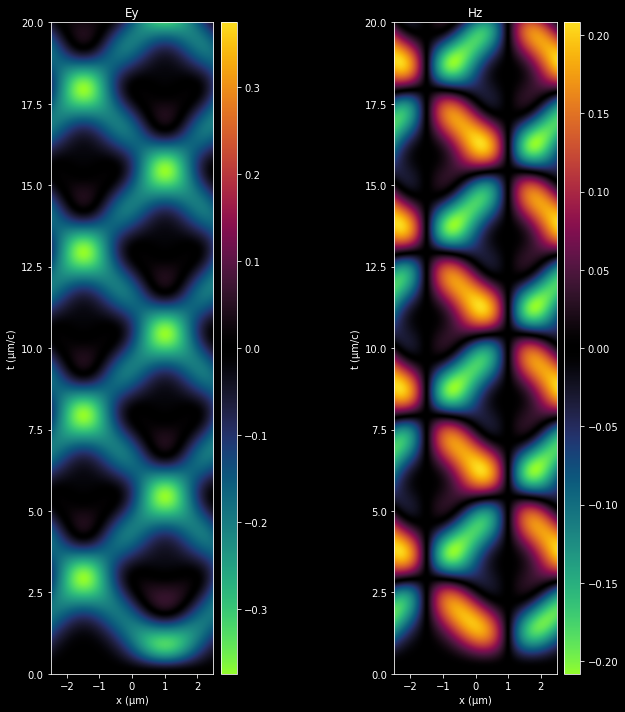

In [23]:
L = 5
λ = L/2.11 # wavelength
ω = 2*np.pi/λ # angular frequency
dx = 0.01
c = 1
T = 20.
def Jsource1(x,t):
    return np.sin(ω*t) * np.exp(-t) * np.sin((x-1)**2)
def Jsource2(x,t):
    x = x - 1
    x = x - L*np.floor(x/L + 1/2)
    return np.sin(ω*t) * np.exp(-t) * np.exp(-(x)**2)
sim_params = {
    'c': c,
    'dx': dx,
    'L': L,
    'T': T,
    'boundary': 'periodic',
    'Jsource': Jsource2

}
sim = fd.FD1Dfree(sim_params)
sim.run()
sim.plot(['Ey','Hz'])

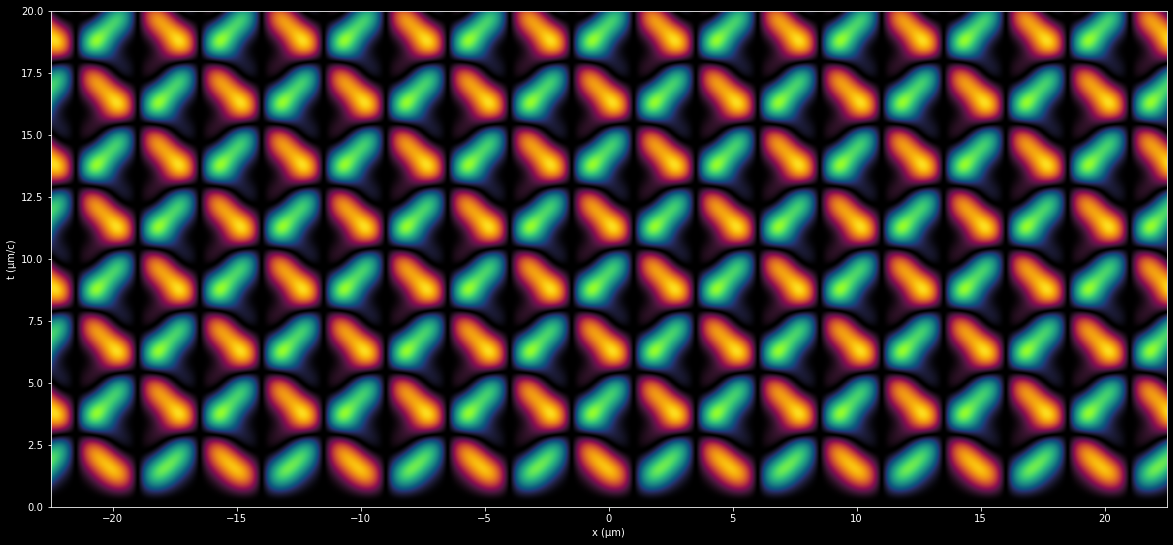

In [24]:
plotData = sim.get_field_history('Hz')
repeats = 9
plotData = np.tile(plotData, (1,repeats))
minF = np.min(plotData)
maxF = np.max(plotData)
prange = max(abs(minF), abs(maxF))

extent = [-sim.L/2*repeats, sim.L/2*repeats, 0, sim.N*sim.dt]
plt.figure(figsize=(20,20))
plt.imshow(plotData, 
            interpolation='none',
            cmap=cmr.wildfire,
            extent=extent,
            aspect=1,
            origin='lower',
            vmin=-prange,
            vmax=prange)
plt.xlabel('x (μm)')
plt.ylabel('t (μm/c)')
plt.show()

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:00<00:00, 16675.79it/s]

Running simulation for 2000 frogsteps ...
Simulation complete


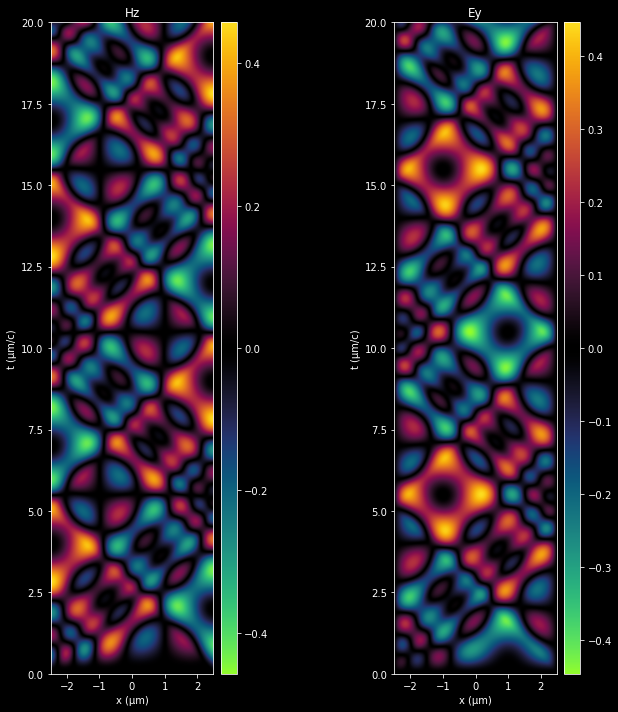

In [25]:
L = 5
λ = L/2.11 # wavelength
ω = 2*np.pi/λ # angular frequency
dx = 0.01
c = 1
T = 20.
def Jsource1(x,t):
    return np.sin(ω*t) * np.exp(-t**2) * np.sin((x-1)**2)
def Jsource2(x,t):
    return np.sin(ω*t) * np.exp(-t) * np.exp(-(x-1)**2*100)
sim_params = {
    'c': c,
    'dx': dx,
    'L': L,
    'T': T,
    'boundary': 'metallic',
    'Jsource': Jsource1

}
sim = fd.FD1Dfree(sim_params)
sim.run()
sim.plot(['Hz','Ey'])